<a href="https://colab.research.google.com/github/Ivan8Garcia/data-science/blob/main/optimizacion_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



In [2]:
datos= pd.read_csv("/content/flights.csv")
datos.shape

(71175, 11)

In [3]:
#estos son los metadatos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [4]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [5]:
# en delay tenemos en la primer fila un retraso de 70 minutos y multiplicamos .20*60 segundos y el resultado son 12seg. asi que tenemos 70min con 12seg
round(.20*60)

12

In [6]:
#igual para arrival_time tenemos 8.885,es la hora de llegada y multiplicamos (60*0.88=53)y tenemos que la hora de llegada es a las 8:53min
round(.885*60)

53

In [7]:
#variables numericas
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [8]:
#variables categoricas
datos.describe(include="O")

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt



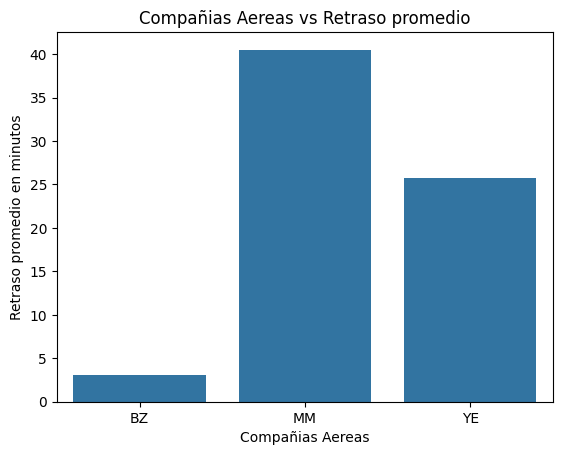

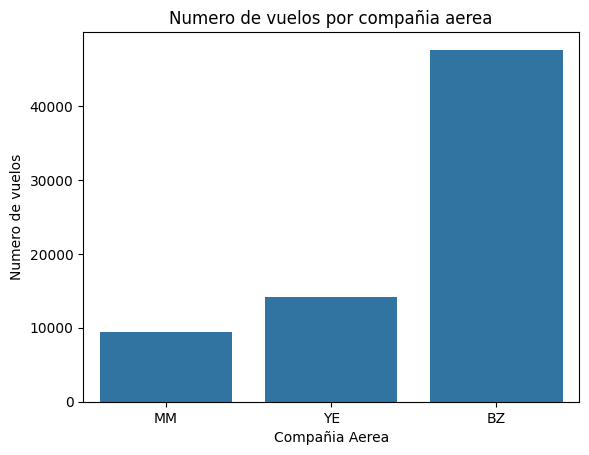

In [10]:
avg_delay= datos.groupby("airline")["delay"].mean().reset_index()
sns.barplot(x="airline",y="delay",data=avg_delay)
plt.title("Compañias Aereas vs Retraso promedio")
plt.xlabel("Compañias Aereas")
plt.ylabel("Retraso promedio en minutos")
plt.show()

sns.countplot(data=datos,x="airline")
plt.title("Numero de vuelos por compañia aerea")
plt.xlabel("Compañia Aerea")
plt.ylabel("Numero de vuelos")
plt.show()

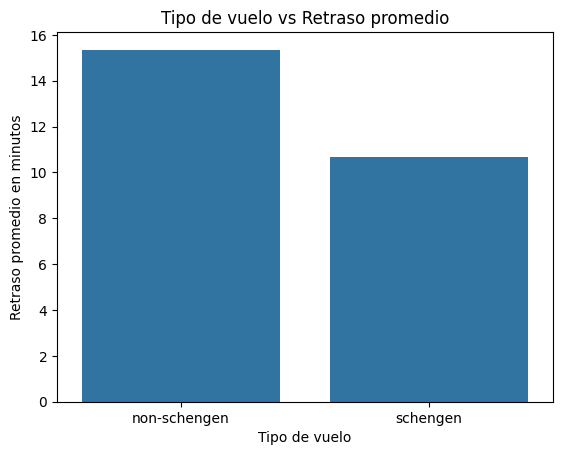

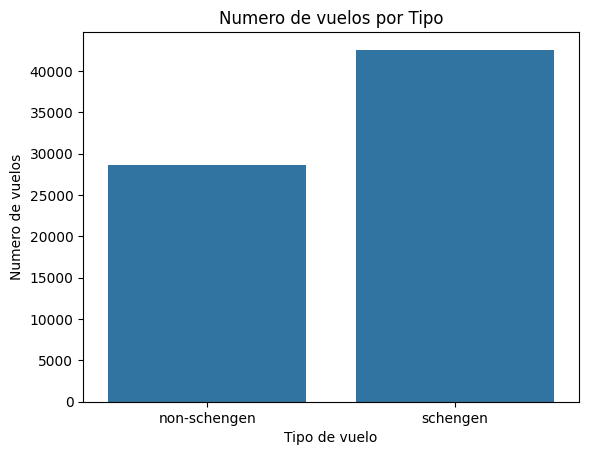

In [11]:
avg_delay= datos.groupby("schengen")["delay"].mean().reset_index()
sns.barplot(x="schengen",y="delay",data=avg_delay)
plt.title("Tipo de vuelo vs Retraso promedio")
plt.xlabel("Tipo de vuelo")
plt.ylabel("Retraso promedio en minutos")
plt.show()

sns.countplot(data=datos,x="schengen")
plt.title("Numero de vuelos por Tipo")
plt.xlabel("Tipo de vuelo")
plt.ylabel("Numero de vuelos")
plt.show()

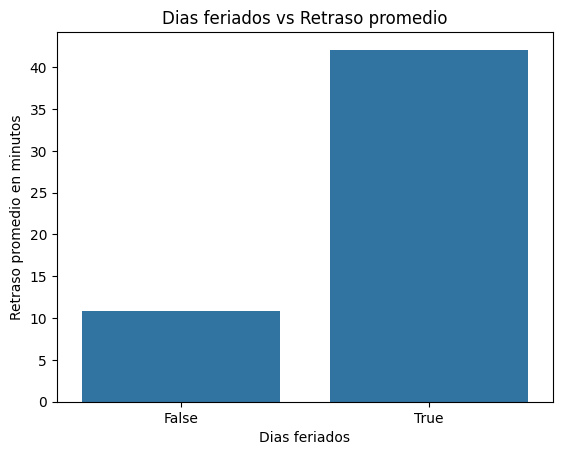

In [12]:
avg_delay= datos.groupby("is_holiday")["delay"].mean().reset_index()
sns.barplot(x="is_holiday",y="delay",data=avg_delay)
plt.title("Dias feriados vs Retraso promedio")
plt.xlabel("Dias feriados")
plt.ylabel("Retraso promedio en minutos")
plt.show()

In [13]:
datos["aircraft_type"].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

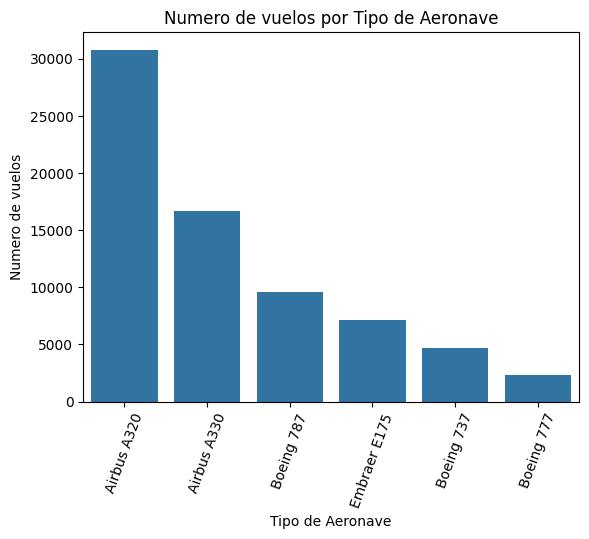

In [14]:
order=datos["aircraft_type"].value_counts().index
sns.countplot(data=datos,x="aircraft_type",order=order)
plt.title("Numero de vuelos por Tipo de Aeronave")
plt.xticks(rotation=70)
plt.xlabel("Tipo de Aeronave")
plt.ylabel("Numero de vuelos")
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

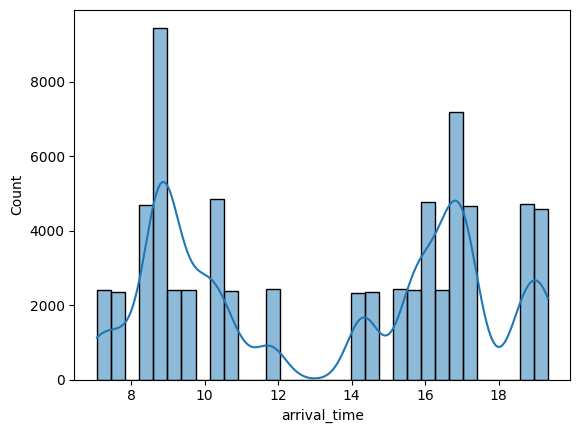

In [15]:
sns.histplot(data=datos,x="arrival_time",kde=True)

In [16]:
import numpy as np

def ancho_bin(df,columna):
  q75,q25= np.percentile(df[columna],[75,25])
  iqr=q75-q25
  ancho=2* iqr* np.power(len(df[columna]),-1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

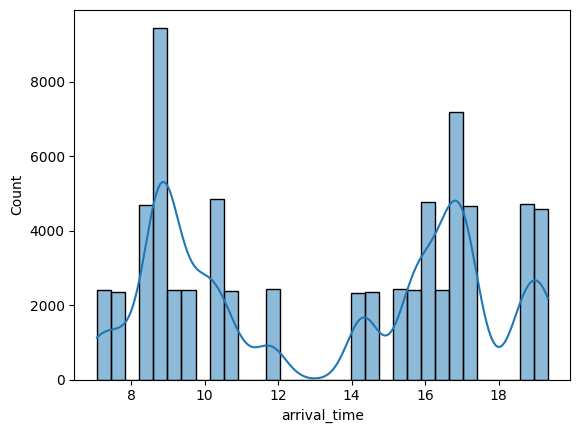

In [17]:
binwidth= ancho_bin(datos,"arrival_time")
sns.histplot(data=datos,x="arrival_time",kde=True,binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

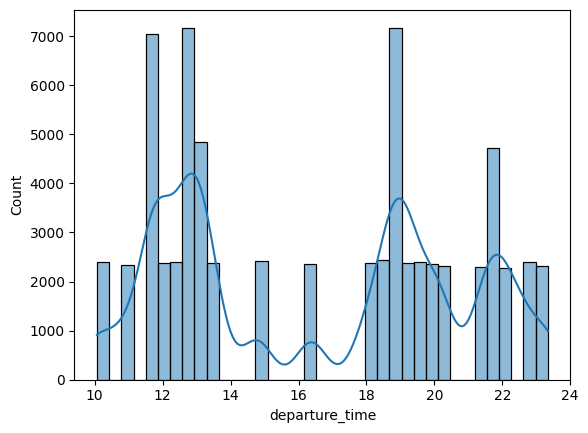

In [18]:
binwidth= ancho_bin(datos,"departure_time")
sns.histplot(data=datos,x="departure_time",kde=True,binwidth=binwidth)

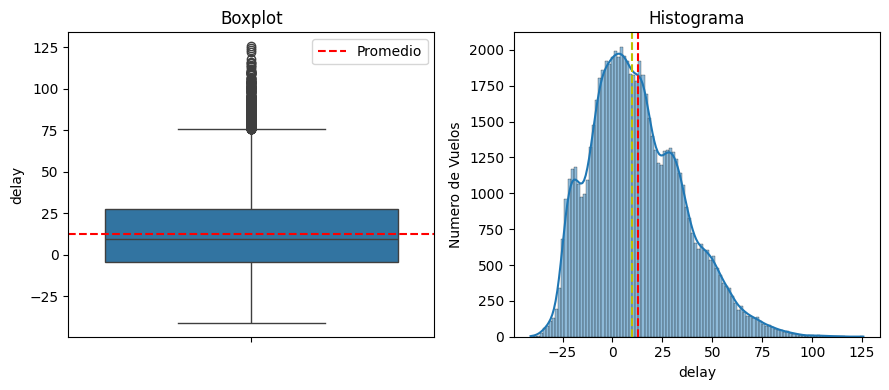

In [19]:
atraso_promedio= datos.delay.mean()
atraso_mediana= datos.delay.median()

#fig=lienzo,ax= ejes(x,y).. subplots(1,2 significa que hay 2 graficas a lado)
fig,ax= plt.subplots(1,2,figsize=(9,4))

#ax=ax[0]significa que es el grafico ubicado a la izquierda
sns.boxplot(data=datos,y="delay",ax=ax[0])
ax[0].set_title("Boxplot")
ax[0].axhline(y=atraso_promedio,color="r",linestyle="--",label="Promedio")
ax[0].legend()

binwidth=ancho_bin(datos,"delay")
sns.histplot(data=datos,x="delay",ax=ax[1],kde=True,binwidth=binwidth)
plt.ylabel("Numero de Vuelos")
plt.grid(False)
ax[1].set_title("Histograma")
ax[1].axvline(x=atraso_promedio,color="r",linestyle="--",label="Promedio")
ax[1].axvline(x=atraso_mediana,color="y",linestyle="--",label="Mediana")
ax[1].legend

plt.tight_layout() #este sirve para que las graficas esten juntitas

plt.show()

#**CLASE 2**

In [20]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [21]:
#creamos una nueva columna llamada date. y convertimos las columnas "year" y "day" a str para concatenarlas ya que anteriormente
# eran int(enteros), y usamos el +1 porque el dia 0 nos lo marca como error, asi que se le tiene que sumar 1
datos["date"]=datos["year"].astype(str)+"-"+(datos["day"]+1).astype(str)
datos["date"]=pd.to_datetime(datos["date"],format= "%Y-%j") #la j es para convertir el dia 1 en 1ero-enero hasta el dia 364 en 31-dic
datos.head(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01


In [22]:
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [24]:
#creando una nueva columna para saber si es fin de semana, recordando que el lunes comienza como 0
datos["is_weekend"]=datos["date"].dt.weekday.isin([5,6])
datos["day_name"]=datos["date"].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
56972,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,148,2020,False,-18.269102,2020-05-28,False,Thursday
48421,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,308,2018,False,11.191564,2018-11-05,False,Monday
40795,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,164,2017,False,7.576811,2017-06-14,False,Wednesday
34149,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,86,2016,False,-1.861435,2016-03-27,True,Sunday
67807,20,YE,Boeing 787,schengen,MWL,16.909690,18.909690,140,2022,False,39.725301,2022-05-21,True,Saturday


In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
#ahora reemplazaremos datos en la columnas que aparecen como booleanos y en schengen
datos["schengen"]=datos["schengen"].replace({"non-schengen":0, "schengen":1})
datos["is_holiday"]=datos["is_holiday"].replace({False:0,True:1})
datos["is_weekend"]=datos["is_weekend"].replace({False:0,True:1})

datos.head(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday


In [33]:
categoricas= ["airline","aircraft_type","origin","day_name"]

pd.get_dummies(data=datos,columns=categoricas,dtype=int).head(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
datos_codificados=pd.get_dummies(data=datos,columns=categoricas,dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
50811,17,0,16.718722,21.718722,102,2019,0,-5.702058,2019-04-13,1,...,0,0,0,0,0,1,0,0,0,0
32892,22,0,8.794147,11.794147,2,2016,0,24.692550,2016-01-03,1,...,0,0,0,0,0,0,1,0,0,0
22876,28,0,15.967963,17.967963,65,2014,0,-15.705983,2014-03-07,0,...,0,0,0,1,0,0,0,0,0,0
51848,29,1,8.591208,11.591208,171,2019,0,9.629180,2019-06-21,0,...,0,0,1,1,0,0,0,0,0,0
5067,29,1,8.591208,11.591208,337,2010,1,25.281648,2010-12-04,1,...,0,0,1,0,0,1,0,0,0,0
